# Year 3

## Importing modules

In [4]:
#standard libs
from math import sqrt
import random
import os

#default data science libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#modules for data preprocessing
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.model_selection import RandomizedSearchCV

#classification models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier




## loading data

In [5]:
data = pd.read_excel('data/3year.xlsx')
data['B'] = (data['B'].index > 10007).astype(int)

In [6]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,B
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


# Data preprocessing

In [7]:
def set_new_headers(df):
    cols = ['X' + str(i+1) for i in range(len(df.columns)-1)]
    cols.append('Y')
    df.columns = cols

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
mean_imputed_df = pd.DataFrame(imputer.fit_transform(data))
set_new_headers(mean_imputed_df)

data_imp = pd.DataFrame()

X = mean_imputed_df.iloc[:, :-1]
Y = mean_imputed_df.iloc[:,-1]

In [8]:
mean_imputed_df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.174190,0.412990,0.143710,1.34800,-28.9820,0.603830,0.219460,1.122500,1.19610,0.463590,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.2910,4.3303,4.03410,0.0
1,0.146240,0.460380,0.282300,1.62940,2.5952,0.000000,0.171850,1.172100,1.60180,0.539620,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.1900,3.5716,5.95000,0.0
2,0.000595,0.226120,0.488390,3.15990,84.8740,0.191140,0.004572,2.988100,1.00770,0.675660,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.8460,5.6287,4.45810,0.0
3,0.024526,0.432360,0.275460,1.78330,-10.1050,0.569440,0.024526,1.305700,1.05090,0.564530,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.7830,3.6950,3.48440,0.0
4,0.188290,0.415040,0.342310,1.92790,-58.2740,0.000000,0.233580,1.409400,1.33930,0.584960,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.5400,3.6303,4.63750,0.0
5,0.182060,0.556150,0.321910,1.60450,16.3140,0.000000,0.182060,0.798080,1.81260,0.443850,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.2400,3.4036,12.45400,0.0
6,0.115030,0.036659,0.923450,112.63000,55.5800,0.000000,0.142150,26.279000,0.44339,0.963340,...,0.067038,0.119400,0.75777,0.015995,18.4330,41.7830,6.8102,53.5960,6.49420,0.0
7,0.009832,0.670660,0.135460,1.23930,-107.7300,-0.001401,0.013422,0.491080,1.18250,0.329340,...,0.197800,0.029854,0.83478,0.143940,8.1813,4.0084,174.7300,2.0889,3.96160,0.0
8,0.238950,0.554730,0.406970,1.76090,-22.9070,0.000000,0.297140,0.802680,2.33170,0.445270,...,0.140380,0.536630,0.87292,0.044584,4.4527,7.1847,83.7270,4.3594,40.09700,0.0
9,-0.119860,0.607330,0.041368,1.06880,-37.5950,-0.447970,-0.119860,0.646550,3.00000,0.392670,...,0.264280,-0.305250,0.73749,0.000000,12.8440,8.3043,73.1720,4.9883,8.39840,0.0


In [9]:
#Using smote to balance data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)
#smote = SMOTE(random_state=32)
#X_train_sm, y_train_sm= smote.fit_sample(X_train, y_train)

In [10]:
#cross validation
nfolds = 10
nclass = 2
ntrain = X_train.shape[0]
ntest = X_test.shape[0]


#kfold = KFold(n_splits=nfolds, random_state=20, shuffle=True)
cross_val = StratifiedKFold(nfolds)

# Creating model objects
## Tuning model hyperparameters

### Logistic regression

In [8]:
log_reg = LogisticRegression()

log_reg_params = {"C": [0.5, 0.55, 0.6],
                 "solver": ['newton-cg', 'sag', 'saga']}

lr_grid = GridSearchCV(log_reg, log_reg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)

lr_grid.fit(X_train, y_train)
lr_best_est = lr_grid.best_estimator_

print("Accuracy (LogisticRegression): {} with params {}".format(lr_grid.best_score_, lr_best_est))


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.5s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   33.1s finished


Accuracy (LogisticRegression): 0.9500816104461371 with params LogisticRegression(C=0.55, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


## Decision tree

In [9]:
d_tree = DecisionTreeClassifier()
d_tree_params = {'criterion': ['gini'],
                'max_depth': [50, 60, 70],
                'max_leaf_nodes': [100, 125, 150]}

dt_grid = GridSearchCV(d_tree, d_tree_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
dt_grid.fit(X_train, y_train)

dt_best_est = dt_grid.best_estimator_
print("Accuracy (Decision tree): {} with params {}".format(dt_grid.best_score_, dt_best_est))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    9.3s finished


Accuracy (Decision tree): 0.955386289445049 with params DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Random forest

In [10]:
r_forest = RandomForestClassifier()
r_forest_params = {'n_estimators': [200, 250],
                'criterion': ['gini'],
                'max_depth': [25, 50],
                'max_features': [64],
                'max_leaf_nodes': [10, 25],
                'bootstrap': [True]}

#r_forest_grid = GridSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#r_forest_grid.fit(X_train_sm, y_train_sm)
rf_random_grid = RandomizedSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
rf_random_grid.fit(X_train, y_train)

rf_best_est = rf_random_grid.best_estimator_
print("Accuracy (Random forest): {} with params {}".format(rf_random_grid.best_score_, rf_best_est))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


C:\Developement\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  9.3min finished


Accuracy (Random forest): 0.9659956474428727 with params RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features=64, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## SVM

In [11]:
#
# SVM classifier в разработке
#


#svm = SVC()
#svm_params = {'kernel': ['linear', 'poly'],
#                'probability': [True],
#                'decision_function_shape': ['ovo']}

#svm_grid = GridSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_grid = RandomizedSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_best_est = svm_grid.best_estimator_
#print("Accuracy (SVM): {} with params {}".format(svm_grid.best_score_, svm_best_est))

## XGboost

In [12]:
xgboost = xgb.XGBClassifier()
xg_params = {
    'booster': ['gbtree', 'gblinear'],
    'eta': [0.3, 0,5],
    'objective': ['binary:logitraw', 'binary:hinge'],
    'gamma':[0,1],
    'max_depth': [8],
    'learning_rate': [0.01, 0.15, 0.20, 0.35]
}

#xgb_grid = GridSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#xgb_grid.fit(X_train_sm, y_train_sm)

xgb_grid = RandomizedSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

xgb_best_est = xgb_grid.best_estimator_
print("Accuracy (XGboosting): {} with params {}".format(xgb_grid.best_score_, xgb_best_est))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


Accuracy (XGboosting): 0.970076169749728 with params XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# Second level

In [11]:
def show_feature_importance(model, features, model_name):
    plt.figure(figsize=(12,8))
    results=pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results=results.sort_values('importance', ascending=False)
    print(results.head(10))
    results.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Feature Importances of ' + model_name)
    return results

In [12]:
ntrain=X_train.shape[0]
ntest = X_test.shape[0]
nclass = 2
SEED = 42
NFOLDS = 10
smote = SMOTE(random_state=32)

kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle=True)
labels = ['Normal','Bankruptcy']

In [13]:
def BuildModel(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    print('tr_ind : ', tr_ind)
    accuracies = []
    
    for i, (train, test) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        print(X_train.shape[0], y_train.shape[0])
        X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)
        
        #print(X_train_sm.shape[1], y_train_sm.shape[1])
        
        clf.fit(X_train_sm[train], y_train_sm[train])
        sc = clf.score(X_train_sm[test], y_train_sm[test])
        print(i, 'accuracy', sc)
        accuracies.append(sc)
        Xr_train[test] = clf.predict_proba(X_train_sm[test])
        Xr_test += clf.predict_proba(X_test)/NFOLDS
    
    print("Mean: {} ; Stdev: {}".format(np.mean(accuracies), np.std(accuracies)))
    
    return Xr_train, Xr_test


def BuildModel_Xgb(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    accuracies = []
    
    for i, (train, test) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)
        clf.fit(X_train_sm[train], y_train_sm[train])
        sc = clf.score(X_train_sm[test], y_train_sm[test])
        print(i, 'accuracy', sc)
        accuracies.append(sc)
        Xr_train[test] = clf.predict_proba(X_train_sm[test])
        Xr_test += clf.predict_proba(X_test, validate_features=False)/NFOLDS
    
    print("Mean: {} ; Stdev: {}".format(np.mean(accuracies), np.std(accuracies)))
    
    return Xr_train, Xr_test

In [14]:
def show_accuracy(Xr, y, labels, best, nclass):
    pred=[]
    for x in Xr:
        if x > best:
            pred.append(1)
        else:
            pred.append(0)
    print(classification_report(y,pred, target_names=labels, digits=4))
    print(confusion_matrix(y, pred, labels=range(nclass)))

In [15]:
def show_auc(y_train_set, pred_train_set):
    thresholds = np.linspace(0.01, 0.5, 1000)
    f1_sc = np.array([f1_score(y_train_set, pred_train_set[:,1] > thr) for thr in thresholds])
    plt.figure(figsize=(12,8))
    plt.plot(thresholds, f1_sc, linewidth=4)
    plt.ylabel("F1 score", fontsize=18)
    plt.xlabel("Threshold", fontsize=18)
    
    best_model_f1 = thresholds[f1_sc.argmax()]
    
    return best_model_f1

## Logistic regression

In [18]:
lr_best = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
pred_train, pred_test=BuildModel(lr_best, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

tr_ind :  [   0    1    2 ... 7349 7350 7351]
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0 accuracy 0.9524456521739131
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


1 accuracy 0.9565217391304348
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


2 accuracy 0.9619047619047619
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


3 accuracy 0.9551020408163265
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


4 accuracy 0.9537414965986395
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


5 accuracy 0.9496598639455782
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


6 accuracy 0.926530612244898
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


7 accuracy 0.9469387755102041
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


8 accuracy 0.9428571428571428
7352 7352
9 accuracy 0.9578231292517007
Mean: 0.9503525214433599 ; Stdev: 0.009494973746266733


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.1859678782755706
0.08424242424242423


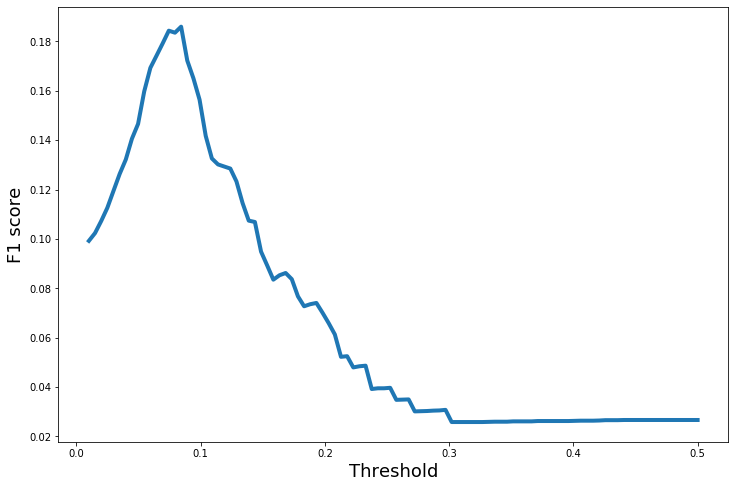

In [21]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc = np.array([f1_score(y_train,pred_train[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_lr = thresholds[f1_sc.argmax()]
print(f1_sc.max())
print(best_lr)

In [22]:
show_accuracy(pred_train[:,1],y_train, labels, best_lr, nclass)

              precision    recall  f1-score   support

      Normal     0.9633    0.8966    0.9288      7003
  Bankruptcy     0.1319    0.3152    0.1860       349

    accuracy                         0.8690      7352
   macro avg     0.5476    0.6059    0.5574      7352
weighted avg     0.9239    0.8690    0.8935      7352

[[6279  724]
 [ 239  110]]


## Decision tree

In [23]:
dt_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=150,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
pred_train_dt, pred_test_dt=BuildModel(dt_best, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

tr_ind :  [   0    1    2 ... 7349 7350 7351]
7352 7352
0 accuracy 0.9592391304347826
7352 7352
1 accuracy 0.9538043478260869
7352 7352
2 accuracy 0.9510204081632653
7352 7352
3 accuracy 0.9605442176870749
7352 7352
4 accuracy 0.9510204081632653
7352 7352
5 accuracy 0.9428571428571428
7352 7352
6 accuracy 0.9292517006802721
7352 7352
7 accuracy 0.9469387755102041
7352 7352
8 accuracy 0.9482993197278912
7352 7352
9 accuracy 0.963265306122449
Mean: 0.9506240757172435 ; Stdev: 0.009375217165204364


0.4653902798232695
0.2525252525252525


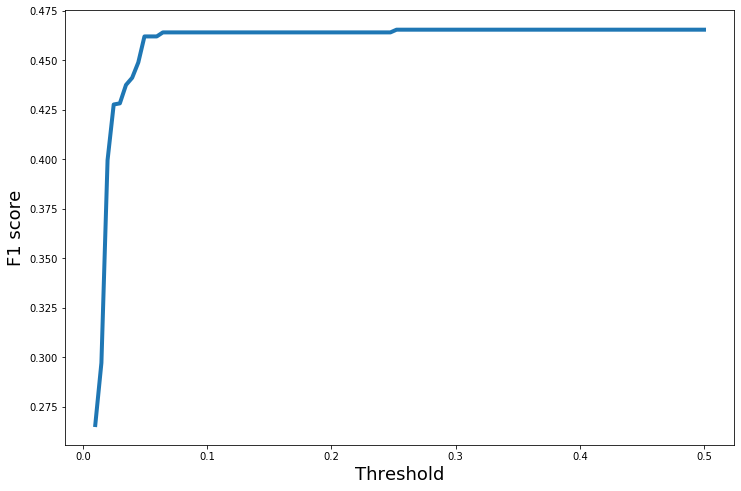

In [24]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_dt = np.array([f1_score(y_train,pred_train_dt[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_dt, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_dt_f1 = thresholds[f1_sc_dt.argmax()]
print(f1_sc_dt.max())
print(best_dt_f1)

In [25]:
show_accuracy(pred_train_dt[:,1],y_train, labels, best_dt_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9728    0.9754    0.9741      7003
  Bankruptcy     0.4788    0.4527    0.4654       349

    accuracy                         0.9506      7352
   macro avg     0.7258    0.7141    0.7198      7352
weighted avg     0.9493    0.9506    0.9500      7352

[[6831  172]
 [ 191  158]]


   feature  importance
33     X34    0.186959
46     X47    0.070760
45     X46    0.061224
4       X5    0.060121
26     X27    0.055543
20     X21    0.040186
57     X58    0.034484
58     X59    0.029352
38     X39    0.029107
47     X48    0.027849


,feature,importance
33,X34,0.186959
46,X47,0.070760
45,X46,0.061224
4,X5,0.060121
26,X27,0.055543
...,...,...
21,X22,0.000000
22,X23,0.000000
29,X30,0.000000
30,X31,0.000000


<Figure size 864x576 with 0 Axes>

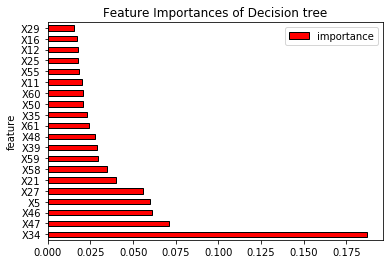

In [26]:
show_feature_importance(dt_best, data.columns[:-1], 'Decision tree')

## Random forest

In [27]:
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=64, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

pred_train_rf, pred_test_rf = BuildModel(rf_best, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

tr_ind :  [   0    1    2 ... 7349 7350 7351]
7352 7352
0 accuracy 0.970108695652174
7352 7352
1 accuracy 0.9741847826086957
7352 7352
2 accuracy 0.9741496598639455
7352 7352
3 accuracy 0.9700680272108844
7352 7352
4 accuracy 0.9619047619047619
7352 7352
5 accuracy 0.9687074829931973
7352 7352
6 accuracy 0.9469387755102041
7352 7352
7 accuracy 0.9551020408163265
7352 7352
8 accuracy 0.9537414965986395
7352 7352
9 accuracy 0.9782312925170068
Mean: 0.9653137015675837 ; Stdev: 0.009839717715103573


f1 score of random forest:  0.5304054054054054
0.23272727272727273


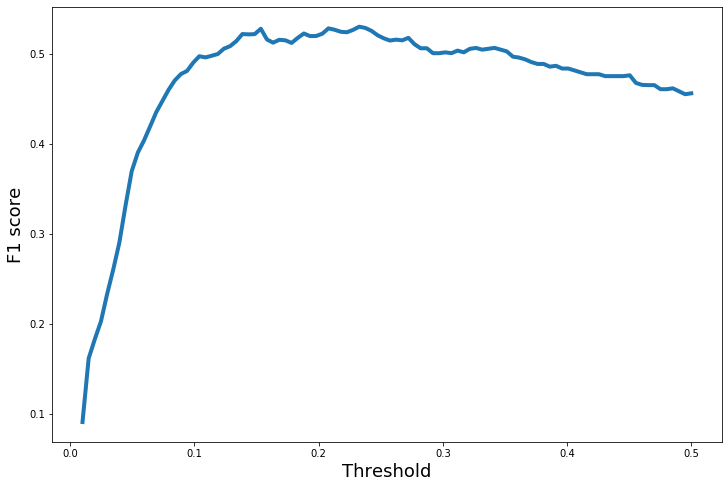

In [28]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_rf = np.array([f1_score(y_train,pred_train_rf[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_rf, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_rf_f1 = thresholds[f1_sc_rf.argmax()]
print('f1 score of random forest: ', f1_sc_rf.max())
print(best_rf_f1)

In [29]:
show_accuracy(pred_train_rf[:,1],y_train, labels, best_rf_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9730    0.9877    0.9803      7003
  Bankruptcy     0.6461    0.4499    0.5304       349

    accuracy                         0.9622      7352
   macro avg     0.8095    0.7188    0.7554      7352
weighted avg     0.9575    0.9622    0.9589      7352

[[6917   86]
 [ 192  157]]


   feature  importance
33     X34    0.291353
26     X27    0.095384
45     X46    0.064072
20     X21    0.058735
46     X47    0.058410
55     X56    0.046486
57     X58    0.040230
25     X26    0.019501
12     X13    0.018821
4       X5    0.016413


,feature,importance
33,X34,0.291353
26,X27,0.095384
45,X46,0.064072
20,X21,0.058735
46,X47,0.058410
...,...,...
2,X3,0.001635
62,X63,0.001438
1,X2,0.001276
6,X7,0.000983


<Figure size 864x576 with 0 Axes>

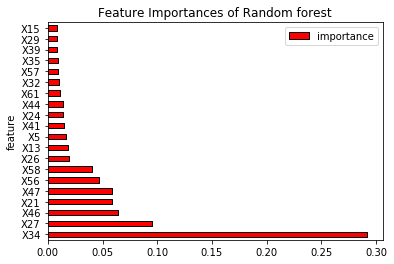

In [30]:
show_feature_importance(rf_best, data.columns[:-1], 'Random forest')

## Xgboost

In [31]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
              learning_rate=0.35, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

pred_train_xgb, pred_test_xgb = BuildModel_Xgb(xgb_best, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NFOLDS)

0 accuracy 0.9755434782608695
1 accuracy 0.9728260869565217
2 accuracy 0.9809523809523809
3 accuracy 0.9782312925170068
4 accuracy 0.964625850340136
5 accuracy 0.9673469387755103
6 accuracy 0.9551020408163265
7 accuracy 0.963265306122449
8 accuracy 0.964625850340136
9 accuracy 0.9782312925170068
Mean: 0.9700750517598344 ; Stdev: 0.00791347322628945


0.5852713178294574


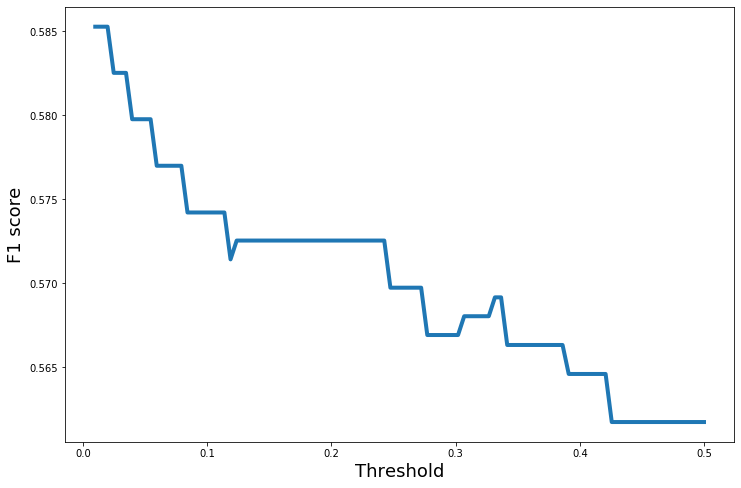

In [32]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_xgb = np.array([f1_score(y_train,pred_train_xgb[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_xgb, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_thr_xgb = thresholds[f1_sc_xgb.argmax()]
print(f1_sc_xgb.max())

In [33]:
show_accuracy(pred_train_xgb[:,1],y_train, labels, best_thr_xgb, nclass)

              precision    recall  f1-score   support

      Normal     0.9724    0.9977    0.9849      7003
  Bankruptcy     0.9042    0.4327    0.5853       349

    accuracy                         0.9709      7352
   macro avg     0.9383    0.7152    0.7851      7352
weighted avg     0.9692    0.9709    0.9659      7352

[[6987   16]
 [ 198  151]]


   feature  importance
33     X34    0.062818
25     X26    0.059090
15     X16    0.046876
22     X23    0.035863
46     X47    0.030267
26     X27    0.025790
20     X21    0.023449
4       X5    0.023148
6       X7    0.023063
34     X35    0.021885


,feature,importance
33,X34,0.062818
25,X26,0.059090
15,X16,0.046876
22,X23,0.035863
46,X47,0.030267
...,...,...
35,X36,0.004539
7,X8,0.003362
17,X18,0.000000
16,X17,0.000000


<Figure size 864x576 with 0 Axes>

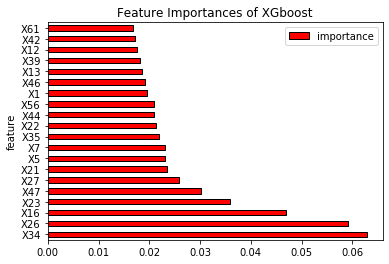

In [34]:
show_feature_importance(xgb_best, data.columns[:-1], 'XGboost')

# LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()

lda.fit(X_train, y_train)

prediction = lda.predict(X_test)
score = lda.score(X_test, y_test)
print(score)

pred_train_lda, pred_test_lda = BuildModel(lda, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.950174547762615
tr_ind :  [   0    1    2 ... 7349 7350 7351]
7352 7352
0 accuracy 0.9524456521739131
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


1 accuracy 0.9551630434782609
7352 7352
2 accuracy 0.9619047619047619
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


3 accuracy 0.9496598639455782
7352 7352
4 accuracy 0.9537414965986395
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


5 accuracy 0.9455782312925171
7352 7352
6 accuracy 0.9238095238095239
7352 7352


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


7 accuracy 0.9496598639455782
7352 7352
8 accuracy 0.9346938775510204
7352 7352
9 accuracy 0.9564625850340136
Mean: 0.9483118899733807 ; Stdev: 0.010684709107428123


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.18389057750759877


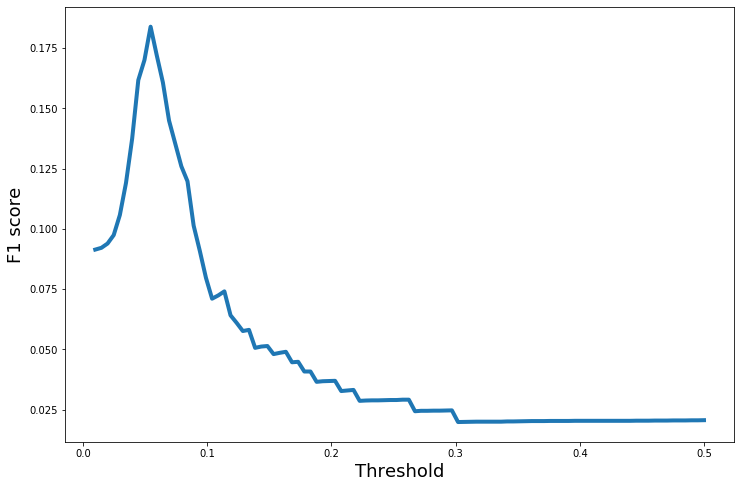

In [17]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_lda = np.array([f1_score(y_train,pred_train_lda[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_lda, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_thr_lda = thresholds[f1_sc_lda.argmax()]
print(f1_sc_lda.max())

In [18]:
show_accuracy(pred_train_lda[:,1],y_train, labels, best_thr_lda, nclass)

              precision    recall  f1-score   support

      Normal     0.9643    0.8792    0.9198      7003
  Bankruptcy     0.1251    0.3467    0.1839       349

    accuracy                         0.8539      7352
   macro avg     0.5447    0.6129    0.5518      7352
weighted avg     0.9245    0.8539    0.8848      7352

[[6157  846]
 [ 228  121]]
